# DOKUMENTASI PENGERJAAN WORKFLOW Projek Pra UTS PSD

## Koneksi Database

![image.png](../image/conn.png)
![image.png](../image/set_conn.png)

Menggunakan PostgreSQL Connector untuk melakukan koneksi ke database  
configurasi seperti berikut:  
  
**host: localhost**  
**db: db_ecoli**  
**port: 2005**  
**username: postgres**  
**password: zanra2401**

## Memilih Table

![image.png](../image/select_table.png)
![image.png](../image/table_select.png)

Gunakan DB Table Selector untuk memilih table yang ingin di gunakan:
configurasi seperti berikut:  
**Schema : public**   
**Table  : ecoli_data**   

## Membaca Data
![image.png](../image/reader.png)  
digunakan untuk membaca data dari database

## Missing Value Filter

![image.png](../image/missing.png)

Memfilter Missing Value namun di data ecoli ini tidak ada missing value

## Deteksi Outlier menggunakan ABOD
![image.png](../image/out_detect.png)
mendteksi outlier dengan ABOD:  

### Code
```python
# Copy input to output
from pycaret.anomaly import *

table = input_table_1.copy()

feature_numeric = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
feature_non_numeric = ["id", "name", "class"]


s = setup(data=table[feature_numeric])

abod_model = create_model("abod", fraction=0.05)

df_abod = assign_model(abod_model)



output_table_1 = df_abod.merge(table[feature_non_numeric], left_index=True, right_index=True)
```

### Output
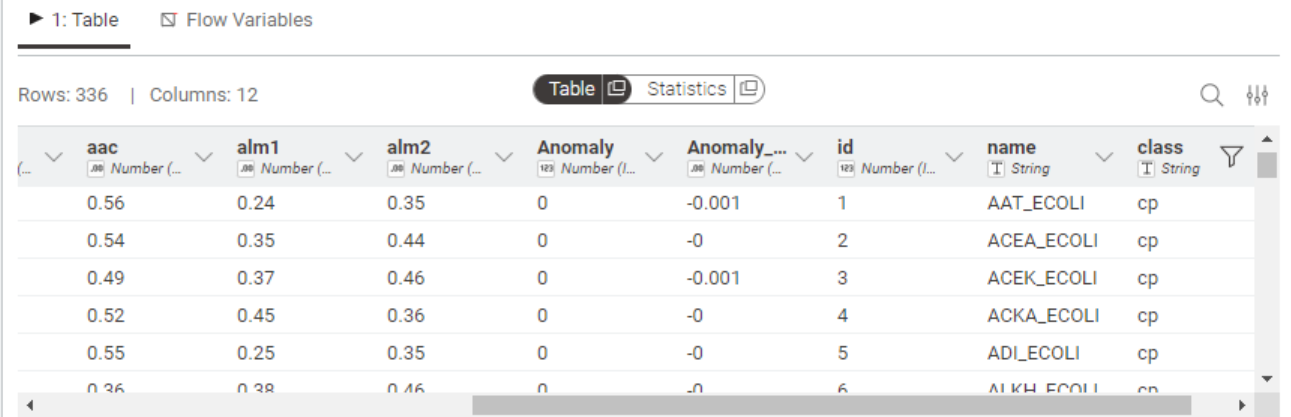

## Ploting Data Outlier
![image.png](../image/out_plot.png)

### Code
```python
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

ecoli_df = input_table_1.copy()

fitur = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]

pca = PCA(n_components=2)

reduced = pd.DataFrame(pca.fit_transform(ecoli_df[fitur])).reset_index(drop=True)
ecoli_df = ecoli_df.reset_index(drop=True)

reduced = reduced.merge(ecoli_df["Anomaly"], left_index=True, right_index=True)



plt.figure(figsize=(10, 6))
for i in [0, 1]:
    plt.scatter(reduced[reduced["Anomaly"] == i][0], reduced[reduced["Anomaly"] == i][1], label=i)

plt.xlabel("X")
plt.ylabel("Y")

plt.legend(title="Anomaly", bbox_to_anchor=(1.12,1), loc="upper right")

output_table_1 = reduced

plt.show()
```

### Output
![image.png](../image/plot.png)
![image.png](../image/h_plot.png)


## Pembersihan Outlier
![image.png](../image/out_clean.png)
Membersihkan outlier  

### Code
```python
import pandas as pd

ecoli_df = input_table_1.copy()

fitur = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]

ecoli_df = ecoli_df[(ecoli_df["Anomaly"] == 0) | (ecoli_df["class"] == "imL") | (ecoli_df["class"] == "imS")][["id", "name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"]]

output_table_1 = ecoli_df

```

### Output
![image.png](../image/h_clean.png)


## Penyeimbangan Data
Menggunakan Python Script  
![image.png](../image/balance.png)

### Distribusi Kelas Awal Pada Data

![image.png](../image/before.png)

### Code
```python
# Copy input to output
ecoli_df = input_table_1.copy()

from imblearn.over_sampling import SMOTE

fitur = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]

p = ecoli_df[fitur]
q = ecoli_df["class"]

p_resampled, q_resampled = SMOTE(random_state=42, k_neighbors=1).fit_resample(p, q)

merge_smote = p_resampled.merge(q_resampled, left_index=True, right_index=True)


output_table_1 = merge_smote
```

### Distribusi Kelas Setelah DiSeimbangkan
![image.png](../image/after.png)

### Output
![image.png](../image/h_balance.png)
